In [3]:
library(dplyr)
library(ggplot2)

pop_us = read.table(file = "C:/Users/Personal/Data-Science-Students/Tables/pop_us.csv", 
                    sep = ',', header = T)
pop_Simple <- select(pop_us, c(SEX, AGE, POPESTIMATE2014))

names(pop_Simple) <- c('SEX', 'AGE', 'pop')

percent <- function(x, digits = 2, format = "f", ...) {
  paste0(formatC(100 * x, format = format, digits = digits, ...), "%")
}

head(pop_us)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



X SEX AGE CENSUS2010POP ESTIMATESBASE2010 POPESTIMATE2010 POPESTIMATE2011
1 1 0   0   3944153       3944160           3951330         3963071        
2 2 0   1   3978070       3978090           3957888         3966510        
3 3 0   2   4096929       4096939           4090862         3971573        
4 4 0   3   4119040       4119051           4111920         4102501        
5 5 0   4   4063170       4063186           4077552         4122303        
6 6 0   5   4056858       4056872           4064653         4087713        
  POPESTIMATE2012 POPESTIMATE2013 POPESTIMATE2014
1 3926665         3945610         3948350        
2 3978006         3943077         3962123        
3 3979952         3992690         3957772        
4 3983049         3992425         4005190        
5 4112638         3994047         4003448        
6 4132210         4123408         4004858

In [4]:
hombres <- filter(pop_Simple, SEX == 1, AGE != 999)
mujeres <- filter(pop_Simple, SEX == 2, AGE != 999) 


In [5]:
pop_us %>% select(c(SEX, AGE, pop_2010 = POPESTIMATE2010, pop_2014 = POPESTIMATE2014)) %>%
    mutate(Cambio = pop_2014 - pop_2010) 

SEX AGE pop_2010  pop_2014  Cambio 
1   0    0  3951330   3948350     -2980
2   0    1  3957888   3962123      4235
3   0    2  4090862   3957772   -133090
4   0    3  4111920   4005190   -106730
5   0    4  4077552   4003448    -74104
6   0    5  4064653   4004858    -59795
7   0    6  4073013   4134352     61339
8   0    7  4043047   4154000    110953
9   0    8  4025604   4119524     93920
10  0    9  4125415   4106832    -18583
11  0   10  4187063   4115254    -71809
12  0   11  4115511   4085636    -29875
13  0   12  4113280   4068790    -44490
14  0   13  4119666   4169346     49680
15  0   14  4145614   4232480     86866
16  0   15  4231003   4163723    -67280
17  0   16  4313252   4167234   -146018
18  0   17  4376368   4184706   -191662
19  0   18  4491005   4225590   -265415
20  0   19  4571385   4326394   -244991
21  0   20  4568470   4418887   -149583
22  0   21  4387914   4489746    101832
23  0   22  4286987   4612322    325335
24  0   23  4217221   4698584    481363
25  0   24  4243589   4692635    449046
26  0   25  4289424   4509594    220170
27  0   26  4160810   4406472    245662
28  0   27  4237010   4332545     95535
29  0   28  4247540   4351851    104311
30  0   29  4210285   4387476    177191
... ... ... ...       ...       ...    
277 2    72   1021293   1183338  162045
278 2    73    955663   1089183  133520
279 2    74    927168   1032934  105766
280 2    75    906215    971263   65048
281 2    76    828132    936270  108138
282 2    77    818306    867417   49111
283 2    78    799410    832296   32886
284 2    79    781029    803512   22483
285 2    80    770510    724040  -46470
286 2    81    716534    704919  -11615
287 2    82    695545    676658  -18887
288 2    83    658442    648016  -10426
289 2    84    611339    624921   13582
290 2    85    577353    565705  -11648
291 2    86    526155    532762    6607
292 2    87    467575    487380   19805
293 2    88    420437    435171   14734
294 2    89    365732    394150   28418
295 2    90    306925    342495   35570
296 2    91    240152    288866   48714
297 2    92    205379    244659   39280
298 2    93    158881    200353   41472
299 2    94    126947    156525   29578
300 2    95     99341    114300   14959
301 2    96     75139     89949   14810
302 2    97     54118     63252    9134
303 2    98     37533     46536    9003
304 2    99     26074     32791    6717
305 2   100     45058     58468   13410
306 2   999 157257573 161920569 4662996

In [6]:
# Ejercicio 1
pop_Simple <- pop_us %>% 
    select(c(SEX, AGE, pop_2010 = POPESTIMATE2010, pop_2014 = POPESTIMATE2014)) %>%
    mutate(Cambio = pop_2014 - pop_2010, Crecimiento = percent((pop_2014/pop_2010)^(1/4)-1),
          Nonesense = Cambio - 2)

head(pop_Simple)

SEX AGE pop_2010 pop_2014 Cambio  Crecimiento Nonesense
1 0   0   3951330  3948350    -2980 -0.02%        -2982  
2 0   1   3957888  3962123     4235 0.03%          4233  
3 0   2   4090862  3957772  -133090 -0.82%      -133092  
4 0   3   4111920  4005190  -106730 -0.66%      -106732  
5 0   4   4077552  4003448   -74104 -0.46%       -74106  
6 0   5   4064653  4004858   -59795 -0.37%       -59797

In [7]:
arrange(mujeres, desc(pop))[1:15, ]

SEX AGE pop    
1  2   54  2331961
2  2   53  2316131
3  2   24  2301237
4  2   23  2298701
5  2   51  2283261
6  2   52  2282051
7  2   50  2279824
8  2   55  2263367
9  2   56  2254749
10 2   22  2244480
11 2   57  2237030
12 2   49  2229216
13 2   25  2213758
14 2   44  2204527
15 2   43  2184835

In [8]:
# factores. Sirven para ponerle nombres a códigos.
pop_HM <- mutate(pop_Simple, SEX = factor(SEX, labels = c('Total', 'Hombre', 'Mujer')))
head(pop_Simple)
head(pop_HM)

SEX AGE pop_2010 pop_2014 Cambio  Crecimiento Nonesense
1 0   0   3951330  3948350    -2980 -0.02%        -2982  
2 0   1   3957888  3962123     4235 0.03%          4233  
3 0   2   4090862  3957772  -133090 -0.82%      -133092  
4 0   3   4111920  4005190  -106730 -0.66%      -106732  
5 0   4   4077552  4003448   -74104 -0.46%       -74106  
6 0   5   4064653  4004858   -59795 -0.37%       -59797

SEX   AGE pop_2010 pop_2014 Cambio  Crecimiento Nonesense
1 Total 0   3951330  3948350    -2980 -0.02%        -2982  
2 Total 1   3957888  3962123     4235 0.03%          4233  
3 Total 2   4090862  3957772  -133090 -0.82%      -133092  
4 Total 3   4111920  4005190  -106730 -0.66%      -106732  
5 Total 4   4077552  4003448   -74104 -0.46%       -74106  
6 Total 5   4064653  4004858   -59795 -0.37%       -59797

# Cambiar el data.frame usando tidyr

dcast(variables id ~ variables que se convierten nombres columnas, valores) 

http://seananderson.ca/2013/10/19/reshape.html

https://rpubs.com/bradleyboehmke/data_wrangling

https://cran.r-project.org/web/packages/tidyr/tidyr.pdf

In [9]:
library(tidyr)
head(pop_HM)

SEX   AGE pop_2010 pop_2014 Cambio  Crecimiento Nonesense
1 Total 0   3951330  3948350    -2980 -0.02%        -2982  
2 Total 1   3957888  3962123     4235 0.03%          4233  
3 Total 2   4090862  3957772  -133090 -0.82%      -133092  
4 Total 3   4111920  4005190  -106730 -0.66%      -106732  
5 Total 4   4077552  4003448   -74104 -0.46%       -74106  
6 Total 5   4064653  4004858   -59795 -0.37%       -59797

In [10]:
wide <- spread(pop_HM, key = SEX, value = pop)
head(wide)
# comparar hombres y mujeres en una sola tabla. 

AGE Total   Hombre  Mujer  
1 0   3948350 2017857 1930493
2 1   3962123 2023253 1938870
3 2   3957772 2022502 1935270
4 3   4005190 2048618 1956572
5 4   4003448 2043498 1959950
6 5   4004858 2043467 1961391

In [12]:
wide %>% mutate(prop_hombres = percent(Hombre/Total))

AGE Total     Hombre    Mujer     prop_hombres
1    0  3948350   2017857   1930493   51.11%      
2    1  3962123   2023253   1938870   51.06%      
3    2  3957772   2022502   1935270   51.10%      
4    3  4005190   2048618   1956572   51.15%      
5    4  4003448   2043498   1959950   51.04%      
6    5  4004858   2043467   1961391   51.02%      
7    6  4134352   2110328   2024024   51.04%      
8    7  4154000   2122240   2031760   51.09%      
9    8  4119524   2105122   2014402   51.10%      
10   9  4106832   2097272   2009560   51.07%      
11  10  4115254   2099874   2015380   51.03%      
12  11  4085636   2083687   2001949   51.00%      
13  12  4068790   2075243   1993547   51.00%      
14  13  4169346   2128187   2041159   51.04%      
15  14  4232480   2164228   2068252   51.13%      
16  15  4163723   2128424   2035299   51.12%      
17  16  4167234   2130938   2036296   51.14%      
18  17  4184706   2138809   2045897   51.11%      
19  18  4225590   2165062   2060528   51.24%      
20  19  4326394   2220790   2105604   51.33%      
21  20  4418887   2269570   2149317   51.36%      
22  21  4489746   2310734   2179012   51.47%      
23  22  4612322   2367842   2244480   51.34%      
24  23  4698584   2399883   2298701   51.08%      
25  24  4692635   2391398   2301237   50.96%      
26  25  4509594   2295836   2213758   50.91%      
27  26  4406472   2240026   2166446   50.83%      
28  27  4332545   2200429   2132116   50.79%      
29  28  4351851   2207185   2144666   50.72%      
30  29  4387476   2217913   2169563   50.55%      
... ... ...       ...       ...       ...         
73   72   2194234   1010896   1183338 46.07%      
74   73   2002191    913008   1089183 45.60%      
75   74   1890366    857432   1032934 45.36%      
76   75   1774697    803434    971263 45.27%      
77   76   1694648    758378    936270 44.75%      
78   77   1557239    689822    867417 44.30%      
79   78   1481505    649209    832296 43.82%      
80   79   1414235    610723    803512 43.18%      
81   80   1264072    540032    724040 42.72%      
82   81   1216009    511090    704919 42.03%      
83   82   1153634    476976    676658 41.35%      
84   83   1090465    442449    648016 40.57%      
85   84   1036186    411265    624921 39.69%      
86   85    924969    359264    565705 38.84%      
87   86    855696    322934    532762 37.74%      
88   87    770685    283305    487380 36.76%      
89   88    675487    240316    435171 35.58%      
90   89    599834    205684    394150 34.29%      
91   90    512845    170350    342495 33.22%      
92   91    426946    138080    288866 32.34%      
93   92    354532    109873    244659 30.99%      
94   93    286333     85980    200353 30.03%      
95   94    218655     62130    156525 28.41%      
96   95    157124     42824    114300 27.25%      
97   96    121184     31235     89949 25.77%      
98   97     83731     20479     63252 24.46%      
99   98     60185     13649     46536 22.68%      
100  99     41828      9037     32791 21.61%      
101 100     72197     13729     58468 19.02%      
102 999 318857056 156936487 161920569 49.22%

# Bike sharing data

http://www.bayareabikeshare.com/open-data

In [13]:
trips <- read.csv('C:/Users/Personal/Data-Science-Students/Tables/babs_open_data_year_2/201508_trip_data.csv', 
                  stringsAsFactors=FALSE)

In [44]:
head(trips)
dim(trips)

Trip.ID Duration Start.Date     
1 913460   765     8/31/2015 23:26
2 913459  1036     8/31/2015 23:11
3 913455   307     8/31/2015 23:13
4 913454   409     8/31/2015 23:10
5 913453   789     8/31/2015 23:09
6 913452   293     8/31/2015 23:07
  Start.Station                                 Start.Terminal End.Date       
1 Harry Bridges Plaza (Ferry Building)          50             8/31/2015 23:39
2 San Antonio Shopping Center                   31             8/31/2015 23:28
3 Post at Kearny                                47             8/31/2015 23:18
4 San Jose City Hall                            10             8/31/2015 23:17
5 Embarcadero at Folsom                         51             8/31/2015 23:22
6 Yerba Buena Center of the Arts (3rd @ Howard) 68             8/31/2015 23:12
  End.Station                              End.Terminal Bike.. Subscriber.Type
1 San Francisco Caltrain (Townsend at 4th) 70           288    Subscriber     
2 Mountain View City Hall                  27            35    Subscriber     
3 2nd at South Park                        64           468    Subscriber     
4 San Salvador at 1st                       8            68    Subscriber     
5 Embarcadero at Sansome                   60           487    Customer       
6 San Francisco Caltrain (Townsend at 4th) 70           538    Subscriber     
  Zip.Code
1 2139    
2 95032   
3 94107   
4 95113   
5 9069    
6 94118

[1] 354152     11

In [65]:
# Ejercicio 2
trips %>% select(Start.Station, End.Station) %>% 
        group_by(Start.Station, End.Station) %>%
        summarise(Num.Viajes = n()) %>% filter(Num.Viajes == 1)

Start.Station                           
1  Beale at Market                         
2  Castro Street and El Camino Real        
3  Castro Street and El Camino Real        
4  Cowper at University                    
5  Cowper at University                    
6  Cowper at University                    
7  Cowper at University                    
8  Evelyn Park and Ride                    
9  Evelyn Park and Ride                    
10 Franklin at Maple                       
11 Market at 4th                           
12 Mezes Park                              
13 MLK Library                             
14 Mountain View Caltrain Station          
15 Palo Alto Caltrain Station              
16 Palo Alto Caltrain Station              
17 Palo Alto Caltrain Station              
18 Park at Olive                           
19 Park at Olive                           
20 Paseo de San Antonio                    
21 Powell Street BART                      
22 Redwood City Caltrain Station           
23 Redwood City Caltrain Station           
24 Redwood City Medical Center             
25 Redwood City Public Library             
26 Redwood City Public Library             
27 Ryland Park                             
28 San Antonio Caltrain Station            
29 San Antonio Caltrain Station            
30 San Antonio Caltrain Station            
31 San Antonio Caltrain Station            
32 San Antonio Shopping Center             
33 San Francisco Caltrain (Townsend at 4th)
34 San Mateo County Center                 
35 San Mateo County Center                 
36 San Salvador at 1st                     
37 Stanford in Redwood City                
38 Stanford in Redwood City                
39 University and Emerson                  
40 University and Emerson                  
41 University and Emerson                  
   End.Station                              Num.Viajes
1  Mezes Park                               1         
2  California Ave Caltrain Station          1         
3  Cowper at University                     1         
4  Evelyn Park and Ride                     1         
5  San Antonio Caltrain Station             1         
6  San Antonio Shopping Center              1         
7  Stanford in Redwood City                 1         
8  Arena Green / SAP Center                 1         
9  San Antonio Shopping Center              1         
10 Palo Alto Caltrain Station               1         
11 Stanford in Redwood City                 1         
12 California Ave Caltrain Station          1         
13 Market at 4th                            1         
14 Japantown                                1         
15 Franklin at Maple                        1         
16 Mountain View City Hall                  1         
17 Redwood City Public Library              1         
18 Mountain View City Hall                  1         
19 San Francisco Caltrain (Townsend at 4th) 1         
20 Santa Clara County Civic Center          1         
21 San Antonio Shopping Center              1         
22 California Ave Caltrain Station          1         
23 Mountain View Caltrain Station           1         
24 Mezes Park                               1         
25 Mezes Park                               1         
26 Palo Alto Caltrain Station               1         
27 SJSU - San Salvador at 9th               1         
28 Cowper at University                     1         
29 Evelyn Park and Ride                     1         
30 Franklin at Maple                        1         
31 San Jose Civic Center                    1         
32 Cowper at University                     1         
33 San Antonio Caltrain Station             1         
34 Cowper at University                     1         
35 Park at Olive                            1         
36 Santa Clara County Civic Center          1         
37 California Ave Caltrain Station          1         
38 Cowper at University                     1         
39 Castro 

In [17]:
starts <- select(trips, Start.Station)

Start.Station                                
1 Harry Bridges Plaza (Ferry Building)         
2 San Antonio Shopping Center                  
3 Post at Kearny                               
4 San Jose City Hall                           
5 Embarcadero at Folsom                        
6 Yerba Buena Center of the Arts (3rd @ Howard)

In [23]:
starts_count <- starts %>% group_by(Start.Station) %>% summarise(Count = n()) 

arrange(starts_count, Count)

Start.Station                                 Count
1   Franklin at Maple                               81 
2   Redwood City Public Library                    118 
3   San Mateo County Center                        127 
4   Redwood City Medical Center                    150 
5   Mezes Park                                     212 
6   Park at Olive                                  376 
7   California Ave Caltrain Station                400 
8   Stanford in Redwood City                       436 
9   SJSU 4th at San Carlos                         475 
10  SJSU - San Salvador at 9th                     494 
11  San Salvador at 1st                            495 
12  Rengstorff Avenue / California Street          501 
13  Santa Clara County Civic Center                534 
14  Adobe on Almaden                               562 
15  Cowper at University                           576 
16  University and Emerson                         605 
17  Arena Green / SAP Center                       647 
18  San Jose Civic Center                          774 
19  San Jose City Hall                             832 
20  St James Park                                  839 
21  Paseo de San Antonio                           856 
22  Japantown                                      885 
23  Redwood City Caltrain Station                  895 
24  Evelyn Park and Ride                           978 
25  San Antonio Caltrain Station                  1058 
26  San Antonio Shopping Center                   1069 
27  MLK Library                                   1099 
28  Palo Alto Caltrain Station                    1116 
29  Ryland Park                                   1120 
30  Castro Street and El Camino Real              1230 
... ...                                           ...  
41  Clay at Battery                                5040
42  Davis at Jackson                               5094
43  Yerba Buena Center of the Arts (3rd @ Howard)  5523
44  Spear at Folsom                                5574
45  South Van Ness at Market                       5876
46  Commercial at Montgomery                       6014
47  Mechanics Plaza (Market at Battery)            6131
48  Powell at Post (Union Square)                  6425
49  Howard at 2nd                                  6660
50  Embarcadero at Bryant                          7483
51  Embarcadero at Folsom                          7596
52  Broadway St at Battery St                      7676
53  5th at Howard                                  7708
54  Civic Center BART (7th at Market)              7760
55  2nd at Folsom                                  7999
56  Grant Avenue at Columbus Avenue                8337
57  Beale at Market                                8359
58  2nd at South Park                              9469
59  Powell Street BART                             9695
60  Market at 4th                                  9894
61  Market at Sansome                             11431
62  Market at 10th                                11885
63  Steuart at Market                             13687
64  Townsend at 7th                               13752
65  2nd at Townsend                               14026
66  Embarcadero at Sansome                        14158
67  Temporary Transbay Terminal (Howard at Beale) 14436
68  Harry Bridges Plaza (Ferry Building)          17255
69  San Francisco Caltrain 2 (330 Townsend)       21758
70  San Francisco Caltrain (Townsend at 4th)      26304

Si solo usan summarize() van a obtener la suma total. Primero hay que agrupar. 

group_by no hace un data.frame nuevo, solo crea un índice que sirve para hacer manipulaciones posteriores. 

Hay algunas funciones para summarise:

        * min(), max(), median(), quantile(x, p),
        * n(), n_distinct(), sum(x), mean(x).
        
        Un truco mean(x > 5) es la proporción de elementos mas grandes que 5. Por qué?
       
summarise crea una nueva columna con el resumen.  

In [24]:
bike_trips <- trips %>% rename(Bike = Bike..)  %>% select(Start.Station, Bike) %>% 
group_by(Bike) %>% summarise(Start_Station = list(Start.Station))

In [25]:
head(bike_trips)

Bike
1  9  
2 10  
3 11  
4 12  
5 13  
6 14  
  Start_Station                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

Problema: cómo tener una lista en la segunda columna? 

group_by también agrupa usando varias columnas. En este caso agrupa elementos que comparten la misma combinación de características.

In [27]:
duration <- trips %>% select(Start.Station, End.Station, Duration)
arrange(duration, desc(Duration))

Start.Station                                
1      South Van Ness at Market                     
2      Market at Sansome                            
3      San Antonio Shopping Center                  
4      University and Emerson                       
5      Redwood City Caltrain Station                
6      Palo Alto Caltrain Station                   
7      San Jose Civic Center                        
8      University and Emerson                       
9      San Jose Civic Center                        
10     San Pedro Square                             
11     Mountain View Caltrain Station               
12     San Jose Diridon Caltrain Station            
13     San Pedro Square                             
14     Redwood City Medical Center                  
15     Japantown                                    
16     Market at 10th                               
17     Harry Bridges Plaza (Ferry Building)         
18     Japantown                                    
19     Harry Bridges Plaza (Ferry Building)         
20     Harry Bridges Plaza (Ferry Building)         
21     Market at 10th                               
22     Market at 10th                               
23     Market at 10th                               
24     Powell Street BART                           
25     Market at 10th                               
26     Grant Avenue at Columbus Avenue              
27     Powell Street BART                           
28     Clay at Battery                              
29     Grant Avenue at Columbus Avenue              
30     Adobe on Almaden                             
...    ...                                          
354123 Powell Street BART                           
354124 2nd at South Park                            
354125 2nd at Townsend                              
354126 Temporary Transbay Terminal (Howard at Beale)
354127 San Francisco Caltrain 2 (330 Townsend)      
354128 Howard at 2nd                                
354129 San Francisco Caltrain (Townsend at 4th)     
354130 Post at Kearny                               
354131 Spear at Folsom                              
354132 Steuart at Market                            
354133 Howard at 2nd                                
354134 Harry Bridges Plaza (Ferry Building)         
354135 San Francisco Caltrain (Townsend at 4th)     
354136 Howard at 2nd                                
354137 Embarcadero at Folsom                        
354138 Embarcadero at Sansome                       
354139 2nd at Townsend                              
354140 Beale at Market                              
354141 Powell Street BART                           
354142 San Francisco Caltrain 2 (330 Townsend)      
354143 Embarcadero at Folsom                        
354144 Golden Gate at Polk                          
354145 South Van Ness at Market                     
354146 2nd at South Park                            
354147 Temporary Transbay Terminal (Howard at Beale)
354148 San Francisco Caltrain 2 (330 Townsend)      
354149 Market at Sansome                            
354150 Yerba Buena Center of the Arts (3rd @ Howard)
354151 Civic Center BART (7th at Market)            
354152 Civic Center BART (7th at Market)            
       End.Station                                   Duration
1      2nd at Folsom                                 17270400
2      Yerba Buena Center of the Arts (3rd @ Howard)  2137000
3      Castro Street and El Camino Real               1852590
4      University and Emerson                         1133540
5      Stanford in Redwood City                        720454
6      California Ave Caltrain Station                 688899
7      SJSU 4th at San Carlos                          655939
8      San Antonio Shopping Center                     611240
9      San Jose Civic Center                           602338
10     San Pedro Square                                594550
11     Palo Alto Caltrain Station      

In [31]:
# Los mismos viajes
tiempo.min <- duration %>% group_by(Start.Station, End.Station) %>% 
    summarize(Duracion.min = min(Duration/60), 
              Duracion.max = max(Duration/60), 
              Duracion.mean = mean(Duration/60))

tiempo.min

Start.Station                                
1    2nd at Folsom                                
2    2nd at Folsom                                
3    2nd at Folsom                                
4    2nd at Folsom                                
5    2nd at Folsom                                
6    2nd at Folsom                                
7    2nd at Folsom                                
8    2nd at Folsom                                
9    2nd at Folsom                                
10   2nd at Folsom                                
11   2nd at Folsom                                
12   2nd at Folsom                                
13   2nd at Folsom                                
14   2nd at Folsom                                
15   2nd at Folsom                                
16   2nd at Folsom                                
17   2nd at Folsom                                
18   2nd at Folsom                                
19   2nd at Folsom                                
20   2nd at Folsom                                
21   2nd at Folsom                                
22   2nd at Folsom                                
23   2nd at Folsom                                
24   2nd at Folsom                                
25   2nd at Folsom                                
26   2nd at Folsom                                
27   2nd at Folsom                                
28   2nd at Folsom                                
29   2nd at Folsom                                
30   2nd at Folsom                                
...  ...                                          
1663 Yerba Buena Center of the Arts (3rd @ Howard)
1664 Yerba Buena Center of the Arts (3rd @ Howard)
1665 Yerba Buena Center of the Arts (3rd @ Howard)
1666 Yerba Buena Center of the Arts (3rd @ Howard)
1667 Yerba Buena Center of the Arts (3rd @ Howard)
1668 Yerba Buena Center of the Arts (3rd @ Howard)
1669 Yerba Buena Center of the Arts (3rd @ Howard)
1670 Yerba Buena Center of the Arts (3rd @ Howard)
1671 Yerba Buena Center of the Arts (3rd @ Howard)
1672 Yerba Buena Center of the Arts (3rd @ Howard)
1673 Yerba Buena Center of the Arts (3rd @ Howard)
1674 Yerba Buena Center of the Arts (3rd @ Howard)
1675 Yerba Buena Center of the Arts (3rd @ Howard)
1676 Yerba Buena Center of the Arts (3rd @ Howard)
1677 Yerba Buena Center of the Arts (3rd @ Howard)
1678 Yerba Buena Center of the Arts (3rd @ Howard)
1679 Yerba Buena Center of the Arts (3rd @ Howard)
1680 Yerba Buena Center of the Arts (3rd @ Howard)
1681 Yerba Buena Center of the Arts (3rd @ Howard)
1682 Yerba Buena Center of the Arts (3rd @ Howard)
1683 Yerba Buena Center of the Arts (3rd @ Howard)
1684 Yerba Buena Center of the Arts (3rd @ Howard)
1685 Yerba Buena Center of the Arts (3rd @ Howard)
1686 Yerba Buena Center of the Arts (3rd @ Howard)
1687 Yerba Buena Center of the Arts (3rd @ Howard)
1688 Yerba Buena Center of the Arts (3rd @ Howard)
1689 Yerba Buena Center of the Arts (3rd @ Howard)
1690 Yerba Buena Center of the Arts (3rd @ Howard)
1691 Yerba Buena Center of the Arts (3rd @ Howard)
1692 Yerba Buena Center of the Arts (3rd @ Howard)
     End.Station                                   Duracion.min Duracion.max
1    2nd at Folsom                                  1.016667     493.30000  
2    2nd at South Park                              1.016667      75.05000  
3    2nd at Townsend                                2.283333     206.25000  
4    5th at Howard                                  3.583333     115.50000  
5    Beale at Market                                3.650000      15.16667  
6    Broadway St at Battery St                      5.850000      61.75000  
7    Civic Center BART (7th at Market)              7.600000     224.73333  
8    Clay at Battery                                4.533333     165.10000  
9    Commercial at Montgomery                       4.583333     106.43333  
10   Davis at Jackson                               6.600000      99.1333

In [28]:
# tiempo.min %>% filter(grepl('2nd at Folsom', Start.Station)) #partida desde 2nd at Folsom 

tiempo.min %>% filter('2nd at Folsom' == Start.Station)

Start.Station End.Station                                   Duracion.min
1  2nd at Folsom 2nd at Folsom                                  61         
2  2nd at Folsom 2nd at South Park                              61         
3  2nd at Folsom 2nd at Townsend                               137         
4  2nd at Folsom 5th at Howard                                 215         
5  2nd at Folsom Beale at Market                               219         
6  2nd at Folsom Broadway St at Battery St                     351         
7  2nd at Folsom Civic Center BART (7th at Market)             456         
8  2nd at Folsom Clay at Battery                               272         
9  2nd at Folsom Commercial at Montgomery                      275         
10 2nd at Folsom Davis at Jackson                              396         
11 2nd at Folsom Embarcadero at Bryant                         179         
12 2nd at Folsom Embarcadero at Folsom                         200         
13 2nd at Folsom Embarcadero at Sansome                        519         
14 2nd at Folsom Embarcadero at Vallejo                        497         
15 2nd at Folsom Golden Gate at Polk                           739         
16 2nd at Folsom Grant Avenue at Columbus Avenue               454         
17 2nd at Folsom Harry Bridges Plaza (Ferry Building)          198         
18 2nd at Folsom Howard at 2nd                                  62         
19 2nd at Folsom Market at 10th                                630         
20 2nd at Folsom Market at 4th                                 238         
21 2nd at Folsom Market at Sansome                             129         
22 2nd at Folsom Mechanics Plaza (Market at Battery)           205         
23 2nd at Folsom Post at Kearny                                201         
24 2nd at Folsom Powell at Post (Union Square)                 377         
25 2nd at Folsom Powell Street BART                            313         
26 2nd at Folsom San Francisco Caltrain (Townsend at 4th)      223         
27 2nd at Folsom San Francisco Caltrain 2 (330 Townsend)       218         
28 2nd at Folsom San Francisco City Hall                       632         
29 2nd at Folsom South Van Ness at Market                      673         
30 2nd at Folsom Spear at Folsom                               154         
31 2nd at Folsom Steuart at Market                             219         
32 2nd at Folsom Temporary Transbay Terminal (Howard at Beale) 112         
33 2nd at Folsom Townsend at 7th                               399         
34 2nd at Folsom Washington at Kearny                          266         
35 2nd at Folsom Yerba Buena Center of the Arts (3rd @ Howard) 145

In [1]:
stations <- read.csv('C:/Users/Personal/Data-Science-Students/Tables/babs_open_data_year_2/201508_station_data.csv', 
                     stringsAsFactors=FALSE)
head(stations)

# Puede ser útil para poner las estaciones en un mapa. 

station_id name                              lat      long      dockcount
1 2          San Jose Diridon Caltrain Station 37.32973 -121.9018 27       
2 3          San Jose Civic Center             37.33070 -121.8890 15       
3 4          Santa Clara at Almaden            37.33399 -121.8949 11       
4 5          Adobe on Almaden                  37.33141 -121.8932 19       
5 6          San Pedro Square                  37.33672 -121.8941 15       
6 7          Paseo de San Antonio              37.33380 -121.8869 15       
  landmark installation
1 San Jose 8/6/2013    
2 San Jose 8/5/2013    
3 San Jose 8/6/2013    
4 San Jose 8/5/2013    
5 San Jose 8/7/2013    
6 San Jose 8/7/2013

In [34]:
Marker.map.table <- stations %>% select(lat, long, name)
head(Marker.map.table)

lat      long      name                             
1 37.32973 -121.9018 San Jose Diridon Caltrain Station
2 37.33070 -121.8890 San Jose Civic Center            
3 37.33399 -121.8949 Santa Clara at Almaden           
4 37.33141 -121.8932 Adobe on Almaden                 
5 37.33672 -121.8941 San Pedro Square                 
6 37.33380 -121.8869 Paseo de San Antonio

# Dibujar mapas en R con ggmap



Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=san+francisco&zoom=13&size=640x640&scale=2&maptype=terrain&language=en-EN&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=san%20francisco&sensor=false
Warning message:
"Ignoring unknown aesthetics: label"Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.
Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.
Warning message:
"Removed 1 rows containing missing values (geom_rect)."Warning message:
"Removed 36 rows containing missing values (geom_point)."Warning message:
"Removed 36 rows containing missing values (geom_text)."

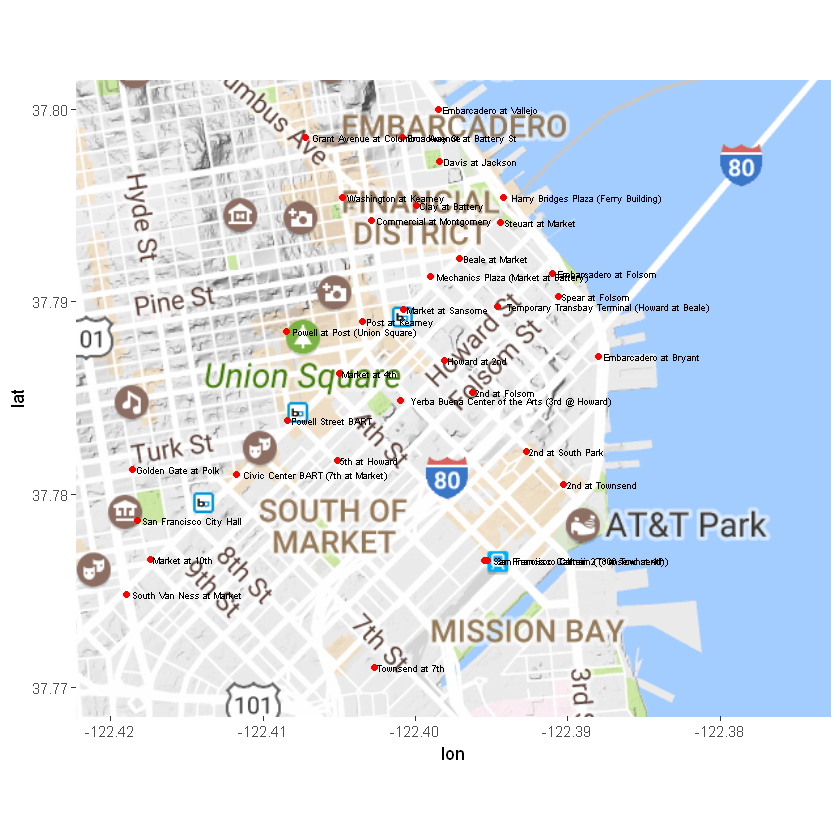

In [74]:
library(ggmap)
# http://stackoverflow.com/questions/14288001/geom-text-not-working-when-ggmap-and-geom-point-used
map <- get_map('san francisco', zoom = 13)

ggmap(map) + geom_point(data = Marker.map.table, aes(x=long, y=lat, label=name), color = "red") + 
    geom_text(data = Marker.map.table, aes(x = long, y = lat, label = name), size = 2, hjust = -0.05) + 
    scale_y_continuous(limits = c(37.77, 37.80)) +
    scale_x_continuous(limits = c(-122.420, -122.375))

In [26]:
clima <- read.csv('C:/Users/Personal/Data-Science-Students/Tables/babs_open_data_year_2/201508_weather_data.csv', 
                  stringsAsFactors=FALSE)
head(clima)

clima.bicis <- clima %>% select(PDT, Max.TemperatureF) %>% 
mutate(Max.TemperatureF = round((Max.TemperatureF - 32)*5/9, 0)) %>% 
rename(Fecha = PDT, Max.Temp = Max.TemperatureF) 

dim(clima.bicis)

head(clima.bicis)

PDT      Max.TemperatureF Mean.TemperatureF Min.TemperatureF Max.Dew.PointF
1 9/1/2014 83               70                57               58            
2 9/2/2014 72               66                60               58            
3 9/3/2014 76               69                61               57            
4 9/4/2014 74               68                61               57            
5 9/5/2014 72               66                60               57            
6 9/6/2014 72               66                60               55            
  MeanDew.PointF Min.DewpointF Max.Humidity Mean.Humidity Min.Humidity ...
1 56             52            86           64            42           ...
2 57             55            84           73            61           ...
3 56             55            84           69            53           ...
4 57             56            84           71            57           ...
5 56             54            84           71            57           ...
6 54             52            84           69            53           ...
  Mean.VisibilityMiles Min.VisibilityMiles Max.Wind.SpeedMPH Mean.Wind.SpeedMPH
1 10                    8                  16                7                 
2 10                    7                  21                8                 
3 10                   10                  21                8                 
4 10                    8                  22                8                 
5  9                    7                  18                8                 
6  9                    7                  17                9                 
  Max.Gust.SpeedMPH PrecipitationIn CloudCover Events WindDirDegrees Zip  
1 20                0               0                 290            94107
2 NA                0               5                 290            94107
3 24                0               4                 276            94107
4 25                0               5                 301            94107
5 32                0               4                 309            94107
6 30                0               4                 290            94107

[1] 1825    2

Fecha    Max.Temp
1 9/1/2014 28      
2 9/2/2014 22      
3 9/3/2014 24      
4 9/4/2014 23      
5 9/5/2014 22      
6 9/6/2014 22

Puede ser útil para saber cuándo la gente anda en bici. 